In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture


In [92]:
x = np.load('/dfs/scratch2/prabhat8/cs236g/cats_500k.npy')

In [93]:
gm = GaussianMixture(n_components=1000, random_state=0, covariance_type='diag', verbose=1).fit(x[:100000])

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
Initialization converged: True


In [94]:
gm.converged_, gm.weights_, gm.weights_.sum(), gm.lower_bound_

(True,
 array([0.00053   , 0.00123013, 0.00137085, 0.00094003, 0.00103032,
        0.00101   , 0.00143999, 0.00093   , 0.00194962, 0.00117947,
        0.00101002, 0.00081   , 0.00175012, 0.00074031, 0.0017139 ,
        0.00118004, 0.00155996, 0.00176999, 0.00086992, 0.00061997,
        0.00099999, 0.00104996, 0.00121996, 0.00097   , 0.00078992,
        0.00133999, 0.00088   , 0.00123999, 0.0017199 , 0.00073985,
        0.00056   , 0.00066   , 0.00091001, 0.00091002, 0.00094999,
        0.00136993, 0.00114   , 0.00065998, 0.00119997, 0.00096   ,
        0.00160003, 0.00125001, 0.00108995, 0.00109001, 0.00078   ,
        0.0014696 , 0.00041   , 0.00153035, 0.00089006, 0.00110965,
        0.00085003, 0.00156926, 0.00157001, 0.00132995, 0.00091992,
        0.00186998, 0.00120005, 0.00145939, 0.00137996, 0.00107998,
        0.00099   , 0.00081006, 0.00130031, 0.00184013, 0.0013401 ,
        0.00084999, 0.00104003, 0.00072999, 0.00106997, 0.00066003,
        0.00159007, 0.00101971, 0.0013600

In [16]:
import matplotlib.pyplot as plt
plt.scatter(gm.weights_)

TypeError: scatter() missing 1 required positional argument: 'y'

In [96]:
import pickle
with open('/dfs/scratch2/prabhat8/cs236g/cats_gm_1000.model', 'wb') as f:
    pickle.dump(gm, f)

(array([2.0000e+00, 5.0000e+00, 1.3000e+01, 1.1700e+02, 6.9400e+02,
        3.8590e+03, 1.8082e+04, 4.4329e+04, 3.0529e+04, 2.3700e+03]),
 array([-423.1745792 , -313.58300096, -203.99142271,  -94.39984446,
          15.19173378,  124.78331203,  234.37489027,  343.96646852,
         453.55804677,  563.14962501,  672.74120326]),
 <BarContainer object of 10 artists>)

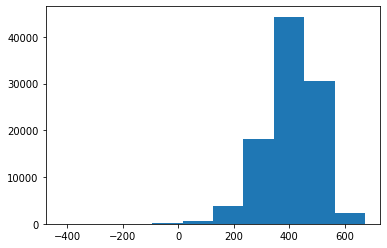

In [97]:
scores = gm.score_samples(x[:100000])
plt.hist(scores)

(-400.0, 600.0)

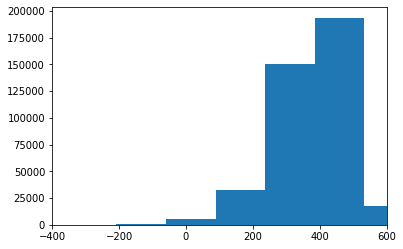

In [98]:
scores = gm.score_samples(x[100000:])
plt.hist(scores)
plt.xlim(-400, 600)

In [99]:
np.percentile(scores[:200000], 30)

336.56507357204623

In [100]:
(scores[200000:] > 350).sum()

131018

In [101]:
xx = x[-200000:]
xx.shape

(200000, 512)

In [110]:
import pickle
with open('/dfs/scratch2/prabhat8/cs236g/bedroom_gm_1000.model', 'rb') as f:
    gm_beds = pickle.load(f)

In [112]:
with open('/dfs/scratch2/prabhat8/cs236g/bedroom_50k_best.npy', 'rb') as f:
    w_beds = np.load(f)

In [115]:
scores_beds = gm_beds.score_samples(w_beds)
labels_beds = gm_beds.predict(w_beds)

In [103]:
thres2idx = {}
for threshold in [350, 400, 450, 500]:
    mask = xx_scores > threshold
    idxes = np.random.choice(np.arange(len(xx))[mask], 10000)
    thres2idx[threshold] = idxes

In [108]:
for k, v in thres2idx.items():
    w_t = xx[v]
    print(w_t.shape)
    np.save(f'/dfs/scratch2/prabhat8/cs236g/cats/threshold_{k}_w.npy', w_t)

(10000, 512)
(10000, 512)
(10000, 512)
(10000, 512)


In [131]:
diverse_idxes = []
# xx_labels = gm.predict(xx)
backlog = 0
for i in range(1000):
    t = 250
    while t >= 100:
        mask = (labels_beds == i) & (scores_beds > t)
        if mask.sum()  > 10:
            break
        t -= 50
        print(i, t)
    if mask.sum() <= 1:
        backlog += 10
        continue
    n_samples = 10
    if mask.sum() < 10:
        n_samples = mask.sum()-1
        backlog += 10 - mask.sum() +1
    elif backlog > 0:
        p = min(np.random.randint(2, 5), backlog)
        n_samples += p
        backlog -= p
    idxes = np.random.choice(np.arange(len(w_beds))[mask], n_samples)
    diverse_idxes.append(idxes)
    
diverse_idxes = np.concatenate(diverse_idxes)
diverse_idxes.shape

69 200
69 150
69 100
69 50
106 200
106 150
106 100
106 50
109 200
109 150
109 100
109 50
112 200
112 150
112 100
112 50
173 200
173 150
173 100
173 50
222 200
222 150
222 100
222 50
232 200
232 150
232 100
232 50
260 200
260 150
260 100
260 50
263 200
263 150
263 100
263 50
271 200
271 150
271 100
271 50
274 200
274 150
274 100
274 50
292 200
292 150
292 100
292 50
299 200
299 150
299 100
299 50
319 200
319 150
319 100
319 50
328 200
328 150
328 100
328 50
406 200
406 150
406 100
406 50
407 200
407 150
407 100
407 50
425 200
425 150
425 100
425 50
438 200
438 150
438 100
438 50
446 200
446 150
446 100
446 50
469 200
469 150
469 100
469 50
479 200
479 150
479 100
479 50
502 200
502 150
502 100
502 50
509 200
509 150
509 100
509 50
520 200
520 150
520 100
520 50
535 200
535 150
535 100
535 50
536 200
536 150
536 100
536 50
594 200
594 150
594 100
594 50
617 200
617 150
617 100
617 50
632 200
632 150
632 100
632 50
646 200
646 150
646 100
646 50
649 200
649 150
649 100
649 50
675 200
675 

(10000,)

In [132]:
np.save(f'/dfs/scratch2/prabhat8/cs236g/images_bedroom/threshold_mixed.npy', images_all[diverse_idxes])

In [67]:
images_x = []
for i in range(5):
    im = np.load(f'/dfs/scratch2/prabhat8/cs236g/images_bedroom/batch_{i}.npy')
    images_x.append(im)


In [68]:
images_all = np.concatenate(images_x)
images_all.shape

(50000, 256, 256, 3)

In [70]:
for k, v in thres2idx.items():
    im_t = images_all[v]
    print(im_t.shape)
    np.save(f'/dfs/scratch2/prabhat8/cs236g/images_bedroom/threshold_{k}.npy', im_t)

(10000, 256, 256, 3)
(10000, 256, 256, 3)
(10000, 256, 256, 3)
(10000, 256, 256, 3)
(10000, 256, 256, 3)


In [82]:
labels_xx = gm.predict(xx)

In [84]:
from collections import Counter
Counter(labels_xx).most_common()

[(54, 126),
 (316, 122),
 (656, 117),
 (599, 115),
 (137, 112),
 (550, 111),
 (889, 110),
 (213, 108),
 (141, 107),
 (15, 107),
 (634, 106),
 (196, 106),
 (455, 105),
 (432, 105),
 (880, 104),
 (416, 104),
 (601, 103),
 (809, 103),
 (124, 102),
 (960, 101),
 (265, 101),
 (382, 101),
 (547, 101),
 (746, 101),
 (197, 100),
 (277, 100),
 (779, 99),
 (393, 99),
 (369, 99),
 (864, 99),
 (437, 98),
 (948, 98),
 (193, 98),
 (74, 98),
 (268, 97),
 (388, 97),
 (822, 96),
 (499, 96),
 (737, 96),
 (744, 96),
 (452, 95),
 (333, 95),
 (172, 95),
 (166, 95),
 (23, 95),
 (75, 94),
 (146, 94),
 (677, 94),
 (572, 93),
 (651, 93),
 (974, 93),
 (373, 93),
 (708, 92),
 (410, 91),
 (593, 91),
 (297, 91),
 (790, 91),
 (611, 90),
 (512, 89),
 (468, 89),
 (386, 89),
 (661, 89),
 (774, 89),
 (108, 89),
 (403, 89),
 (539, 89),
 (666, 89),
 (53, 88),
 (758, 88),
 (471, 88),
 (542, 88),
 (337, 88),
 (652, 88),
 (979, 88),
 (720, 88),
 (279, 88),
 (673, 87),
 (490, 87),
 (327, 87),
 (701, 87),
 (803, 86),
 (688, 8

484 300
955 350
672 300
277 400
747 400
895 400
153 400
692 350
32 400
142 300


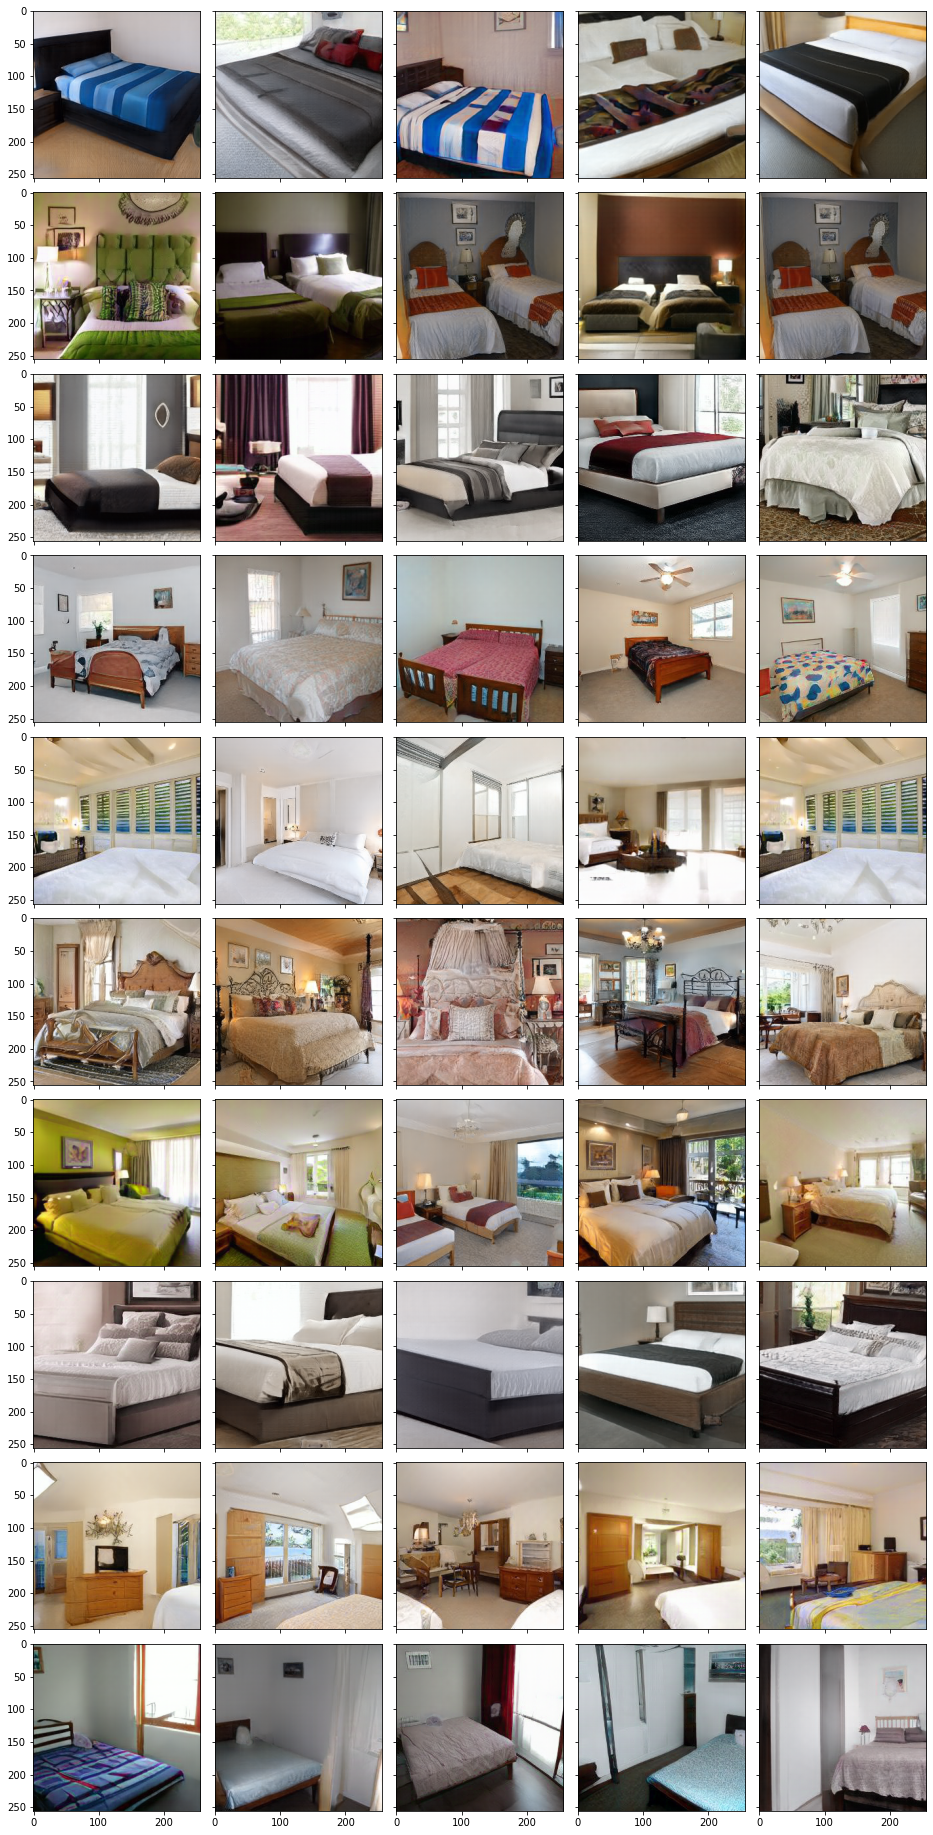

In [142]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random

n = 10
classes = np.random.choice(1000, n, p=gm_beds.weights_, replace=False)
fig = plt.figure(figsize=(16., 40.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(n, 5),  # creates 2x2 grid of axes
                 axes_pad=0.2,  # pad between axes in inch.
                             )

idxes = []
for i, class_ in enumerate(classes):
    # Iterating over the grid returns the Axes.
    class_mask = labels_beds == class_
    scores_class = scores_beds[class_mask]
    images_class = images_all[class_mask]
    t = 400
    while t > 50:
        mask = (scores_class > t)
        if mask.sum() > 10:
            break
        t -= 50
    print(class_, t)
    images_good = images_class[mask]
    for idx, image_id in enumerate(np.random.choice(len(images_good), 5, replace=False)): 
        grid[i*5 + idx].imshow(images_good[image_id])
# print(idxes)
# print([scores_beds[idx] for idx in idxes])
# print(gm_beds.predict([w_beds[idx] for idx in idxes]))
plt.savefig('bedroom2.pdf')
plt.show()


In [137]:
plt.savefig('bedroom.pdf')

<Figure size 432x288 with 0 Axes>

In [47]:
sample_x = x[300000:][scores[200000:] > 250]

In [55]:
xx = sample_x[np.random.choice(len(sample_x), size=50000)]

(200.0, 600.0)

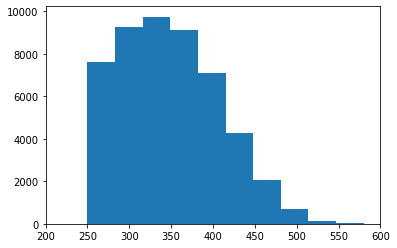

In [57]:
scores = gm.score_samples(xx)
plt.hist(scores)
plt.xlim(200, 600)

In [60]:
np.save('/dfs/scratch2/prabhat8/cs236g/bedroom_50k_best.npy', xx)

(array([  31.,  137.,  527., 1206., 2007., 2248., 2060., 1230.,  457.,
          97.]),
 array([150.64943994, 182.88242526, 215.11541057, 247.34839588,
        279.58138119, 311.81436651, 344.04735182, 376.28033713,
        408.51332245, 440.74630776, 472.97929307]),
 <BarContainer object of 10 artists>)

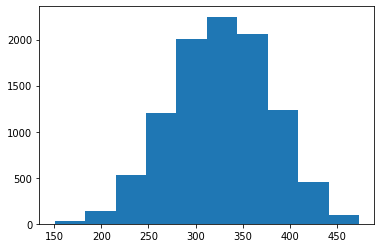

In [30]:
rnd_x, _ = gm.sample(10000)
scores = gm.score_samples(rnd_x)
plt.hist(scores)